# Kelompok 2 Statistika & Probabilitas

**Hazwan Adhikara Nasution (5027231017)**

**Hasan (5027231073)**

**Azza Farichi Tjahjono (5027231071)**

# Smoker Status Prediction

## Tujuan
>Analisis ini bertujuan untuk mengetahui pola dan karakteristik yang dapat digunakan untuk menentukan apakah seseorang merupakan perokok atau tidak, dengan memanfaatkan data set yang telah disediakan


## Data Sets

Link Dataset = https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction

**Description**

- age = umur
- height(cm) = Tinggi(cm)
- weight(kg) = Berat badan(kg)
- waist(cm) = Panjang lingkar pinggang(cm)
- eyesight(left) = Penglihatan mata kiri
- eyesight(right) = Penglihatan mata kanan
- hearing(left) = Pendengaran pada telinga kiri
- hearing(right) = Pendengaran pada telinga kanan
- systolic = Tekanan darah sistolik
- relaxation = Tekanan darah diastolik
- fasting blood sugar = Gula darah
- Cholesterol = Kadar kolesterol total
- triglyceride = Kadar trigliserida
- HDL = Kadar kolesterol HDL (High-Density Lipoprotein) dalam darah
- LDL = Kadar kolesterol LDL (Low-Density Lipoprotein) dalam darah
- hemoglobin = Kadar hemoglobin dalam darah
- Urine protein = Protein dalam urin
- serum creatinine = Kadar kreatinin dalam darah
- AST = Kadar enzim AST (glutamic oxaloacetic transaminase) dalam darah
- ALT = Kadar enzim ALT (glutamic pyruvic transaminase) dalam darah
- Gtp = Kadar enzim GTP (gamma-glutamyl transferase) dalam darah
- dental caries = Kondisi karies gigi 

>Target Variabel = smoking

### Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preparation

In [2]:
df = pd.read_csv('../data/train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [4]:
df.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   35         170          85       97.0             0.9              0.9   
1   20         175         110      110.0             0.7              0.9   
2   45         155          65       86.0             0.9              0.9   
3   45         165          80       94.0             0.8              0.7   
4   20         165          60       81.0             1.5              0.1   

   hearing(left)  hearing(right)  systolic  relaxation  ...  HDL  LDL  \
0              1               1       118          78  ...   70  142   
1              1               1       119          79  ...   71  114   
2              1               1       110          80  ...   57  112   
3              1               1       158          88  ...   46   91   
4              1               1       109          64  ...   47   92   

   hemoglobin  Urine protein  serum creatinine   AST   ALT  Gtp  \
0        19.8              1               1.0    61   115  125   
1        15.9              1               1.1    19    25   30   
2        13.7              3               0.6  1090  1400  276   
3        16.9              1               0.9    32    36   36   
4        14.9              1               1.2    26    28   15   

   dental caries  smoking  
0              1        1  
1              1        0  
2              0        0  
3              0        0  
4              0        0  

[5 rows x 23 columns]

In [5]:
df.tail()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
38979   40         165          60       80.0             0.4   
38980   45         155          55       75.0             1.5   
38981   40         170         105      124.0             0.6   
38982   40         160          55       75.0             1.5   
38983   55         175          60       81.1             1.0   

       eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  \
38979              0.6              1               1       107          60   
38980              1.2              1               1       126          72   
38981              0.5              1               1       141          85   
38982              1.5              1               1        95          69   
38983              1.0              1               1       114          66   

       ...  HDL  LDL  hemoglobin  Urine protein  serum creatinine  AST  ALT  \
38979  ...   61   72        12.3              1               0.5   18   18   
38980  ...   76  131        12.5              2               0.6   23   11   
38981  ...   48  138        17.1              1               0.8   24   23   
38982  ...   79  116        12.0              1               0.6   24   20   
38983  ...   64  137        13.9              1               1.0   18   12   

       Gtp  dental caries  smoking  
38979   21              1        0  
38980   12              0        0  
38981   35              1        1  
38982   17              0        1  
38983   16              0        1  

[5 rows x 23 columns]

In [6]:
df.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38984.000000  38984.000000  38984.000000  38984.000000    38984.000000   
mean      44.127591    164.689488     65.938718     82.062115        1.014955   
std       12.063564      9.187507     12.896581      9.326798        0.498527   
min       20.000000    130.000000     30.000000     51.000000        0.100000   
25%       40.000000    160.000000     55.000000     76.000000        0.800000   
50%       40.000000    165.000000     65.000000     82.000000        1.000000   
75%       55.000000    170.000000     75.000000     88.000000        1.200000   
max       85.000000    190.000000    135.000000    129.000000        9.900000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     38984.000000   38984.000000    38984.000000  38984.000000   
mean          1.008768       1.025369        1.026190    121.475631   
std           0.493813       0.157246        0.159703     13.643521   
min           0.100000       1.000000        1.000000     71.000000   
25%           0.800000       1.000000        1.000000    112.000000   
50%           1.000000       1.000000        1.000000    120.000000   
75%           1.200000       1.000000        1.000000    130.000000   
max           9.900000       2.000000        2.000000    233.000000   

         relaxation  ...           HDL           LDL    hemoglobin  \
count  38984.000000  ...  38984.000000  38984.000000  38984.000000   
mean      75.994408  ...     57.293146    115.081495     14.624264   
std        9.658734  ...     14.617822     42.883163      1.566528   
min       40.000000  ...      4.000000      1.000000      4.900000   
25%       70.000000  ...     47.000000     91.000000     13.600000   
50%       76.000000  ...     55.000000    113.000000     14.800000   
75%       82.000000  ...     66.000000    136.000000     15.800000   
max      146.000000  ...    359.000000   1860.000000     21.100000   

       Urine protein  serum creatinine           AST           ALT  \
count   38984.000000      38984.000000  38984.000000  38984.000000   
mean        1.086523          0.886030     26.198235     27.145188   
std         0.402107          0.220621     19.175595     31.309945   
min         1.000000          0.100000      6.000000      1.000000   
25%         1.000000          0.800000     19.000000     15.000000   
50%         1.000000          0.900000     23.000000     21.000000   
75%         1.000000          1.000000     29.000000     31.000000   
max         6.000000         11.600000   1090.000000   2914.000000   

                Gtp  dental caries       smoking  
count  38984.000000   38984.000000  38984.000000  
mean      39.905038       0.214421      0.367279  
std       49.693843       0.410426      0.482070  
min        2.000000       0.000000      0.000000  
25%       17.000000       0.000000      0.000000  
50%       26.000000       0.000000      0.000000  
75%       44.000000       0.000000      1.000000  
max      999.000000       1.000000      1.000000  

[8 rows x 23 columns]

>mengecek missing value

In [7]:
df.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

### Exploratory Data Analysis



>Tujuan : Menemukan Insight dari Dataset yang diberikan

##### Analisis Jumlah Perokok

In [8]:
sns.set_style("darkgrid")
sns.set_palette("bright")

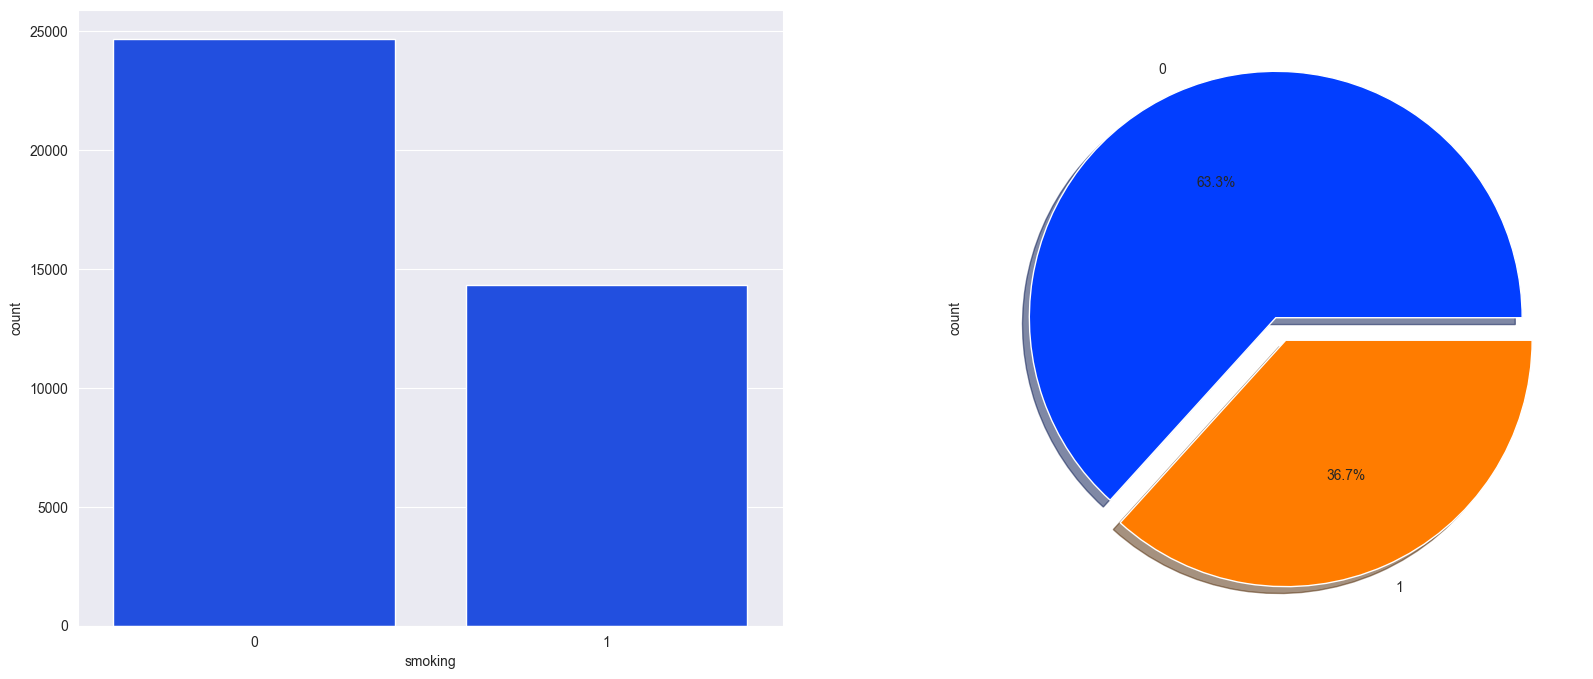

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=df, x="smoking", ax=ax[0])
df["smoking"].value_counts().plot.pie(ax=ax[1], shadow=True, explode=[0, 0.1], autopct="%1.1f%%")

plt.show()

In [10]:
positif = df[df["smoking"] == 1].shape[0]
negatif = df[df["smoking"] == 0].shape[0]

print("Jumlah Perokok: ", positif)
print("Jumlah orang yang bukan Perokok: ", negatif)

Jumlah Perokok:  14318
Jumlah orang yang bukan Perokok:  24666


#### Heatmap

<Axes: >

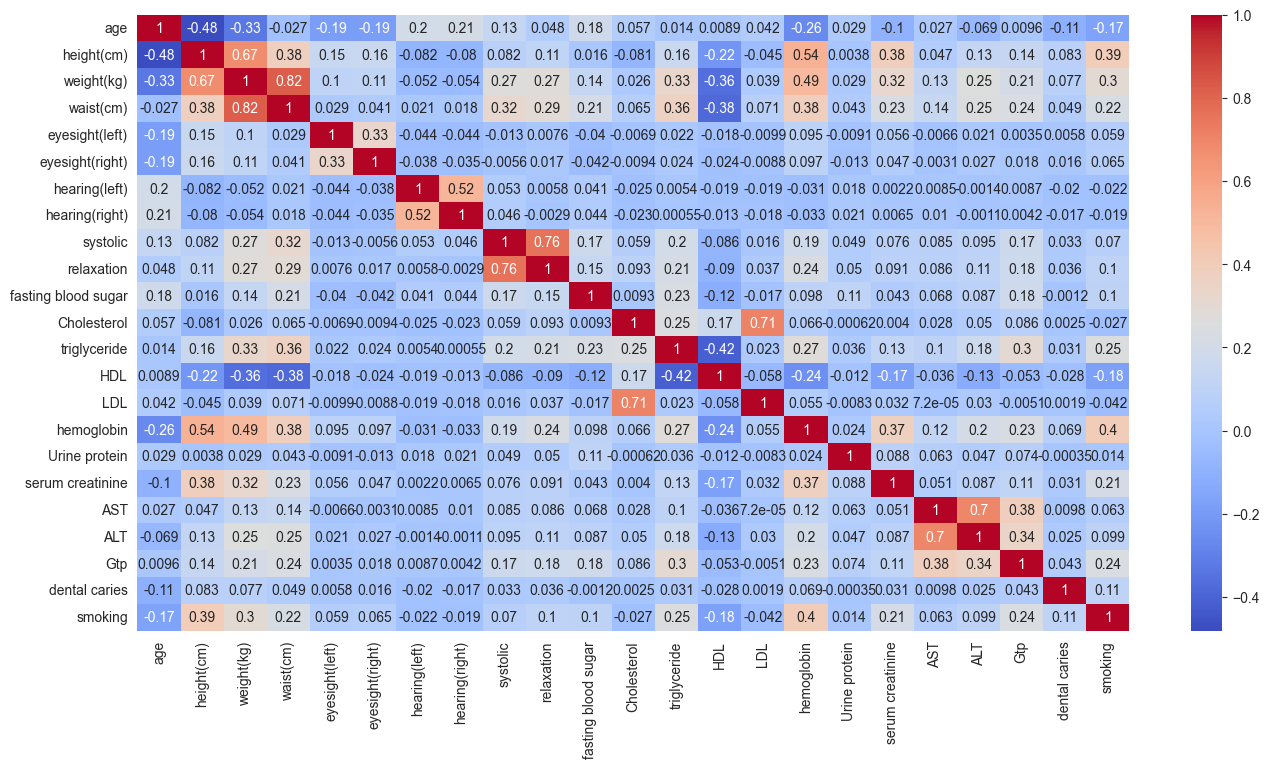

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(method ='pearson'), annot = True, cmap='coolwarm')

>Dari data tersebut terlihat bahwa, kotak yang memiliki warna semakin merah maka, dapat kita bilang memiliki korelasi yang besar.

- Dari heatmap tersebut, terlihat ada angka yang menunjukkan angka negatif, artinya ketika bilangan itu negatif, data tersebut memiliki hubungan yang berbanding terbalik. Sedangkan, untuk data yang positif memiliki hubungan yang berbanding lurus.

- Jika angka mendekati nol, maka semakin dikit korelasi, dalam artian tidak memiliki hubungan yang dapat menyimpulkan.

>melihat sebaran data

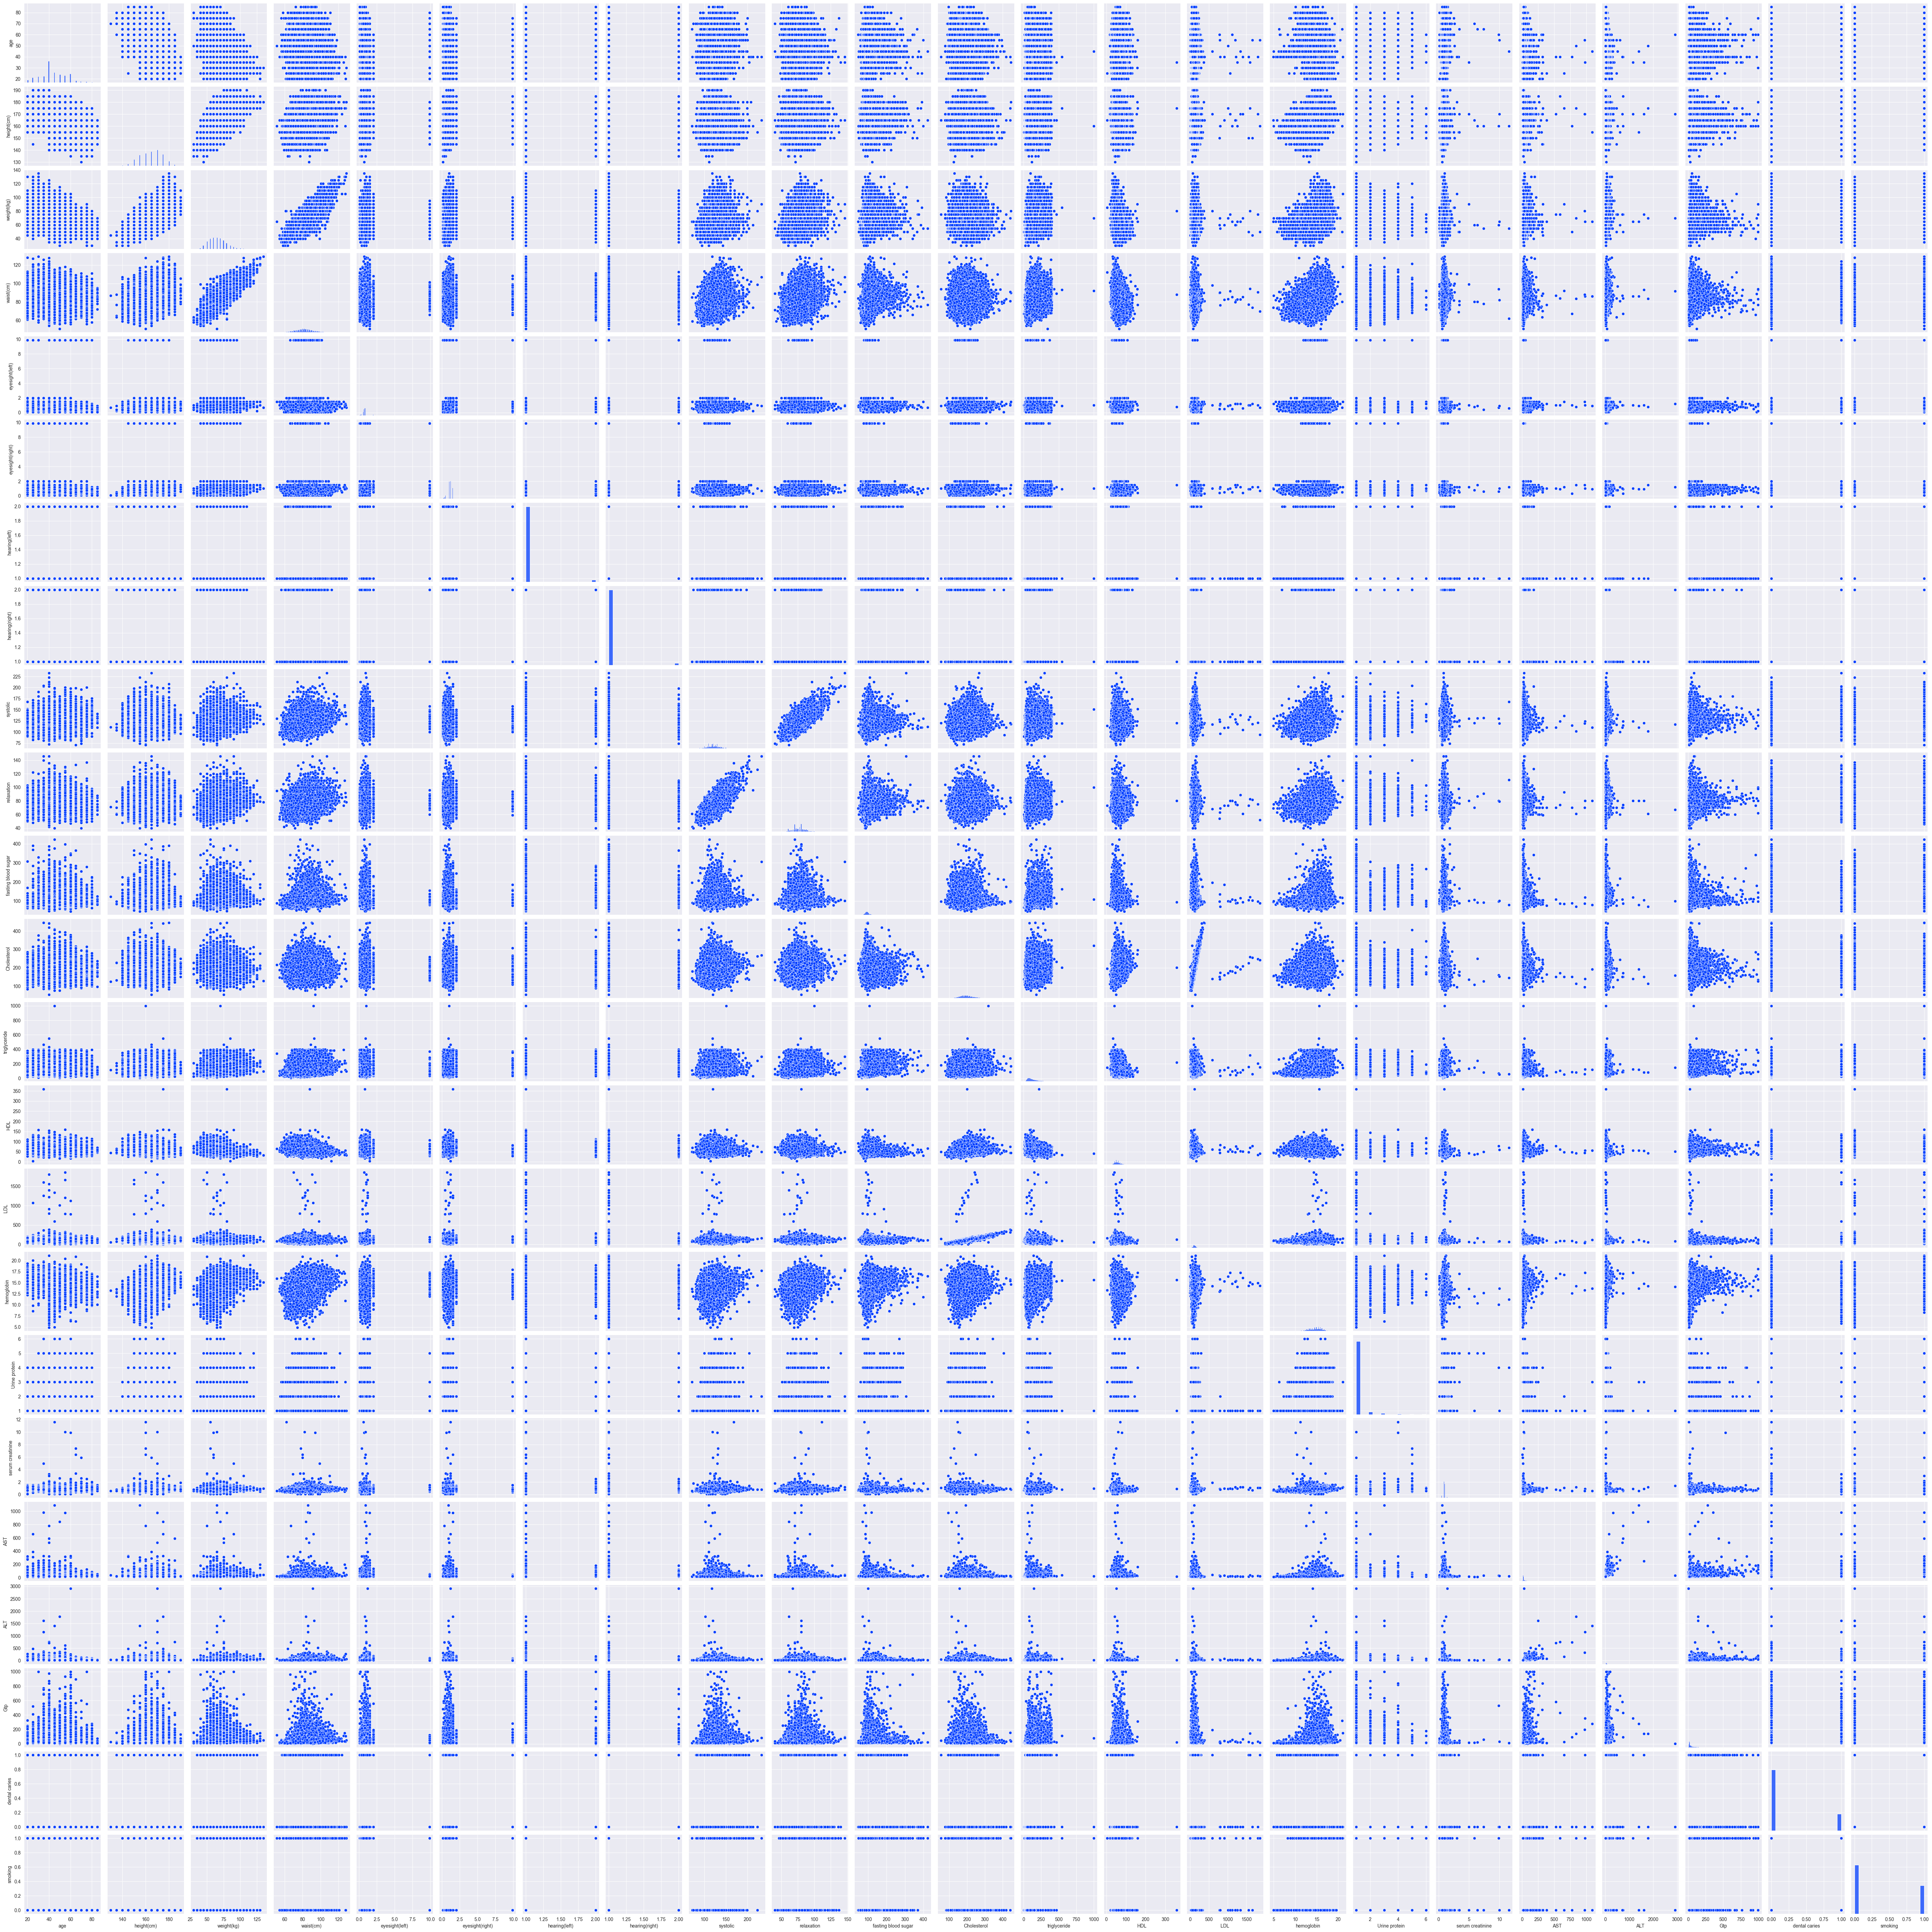

In [12]:
sns.pairplot(df)

>karena data tersebut tidak terlalu jelas untuk dianalisis, maka kita mencari cara untuk menampilkan pasangan data secara lebih jelas.

*Oleh karena itu, kita akan bandingkan data satu per satu untuk mempermudah analisis kita*

#### Analysis Pembanding Perokok

*Perbandingan Perokok dengan Tinggi Badan*

<Axes: xlabel='height(cm)', ylabel='count'>

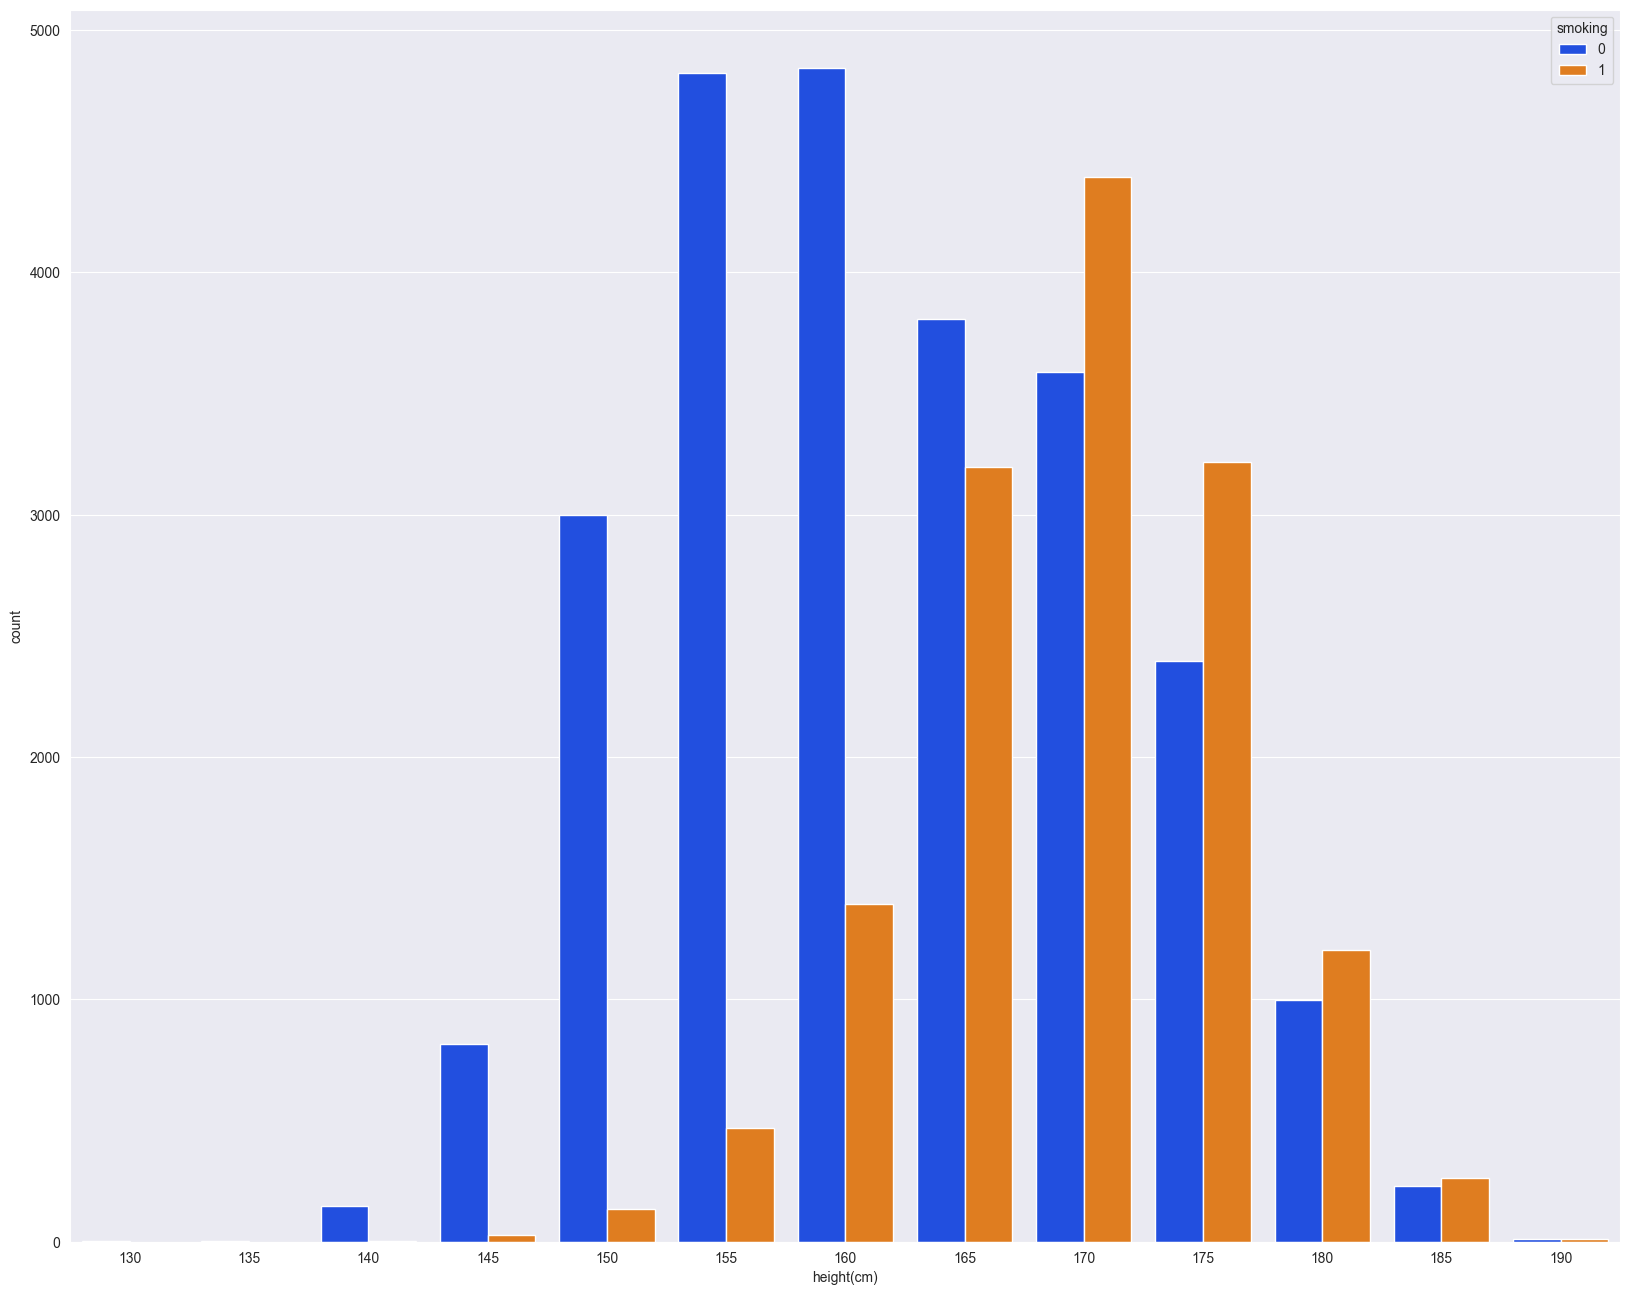

In [13]:
plt.figure(figsize = (20, 16))
sns.countplot(data = df, x = 'height(cm)', hue = 'smoking', palette = 'bright')

>Berdasarkan diagram diatas, dapat kita simpulkan bahwa persentase perokok jika dibandingkan dengan yang tidak merokok lebih besar untuk orang dengan tinggi diatas 170 cm.

*Perbandingan Perokok dengan Berat Badan*

<Axes: xlabel='weight(kg)', ylabel='count'>

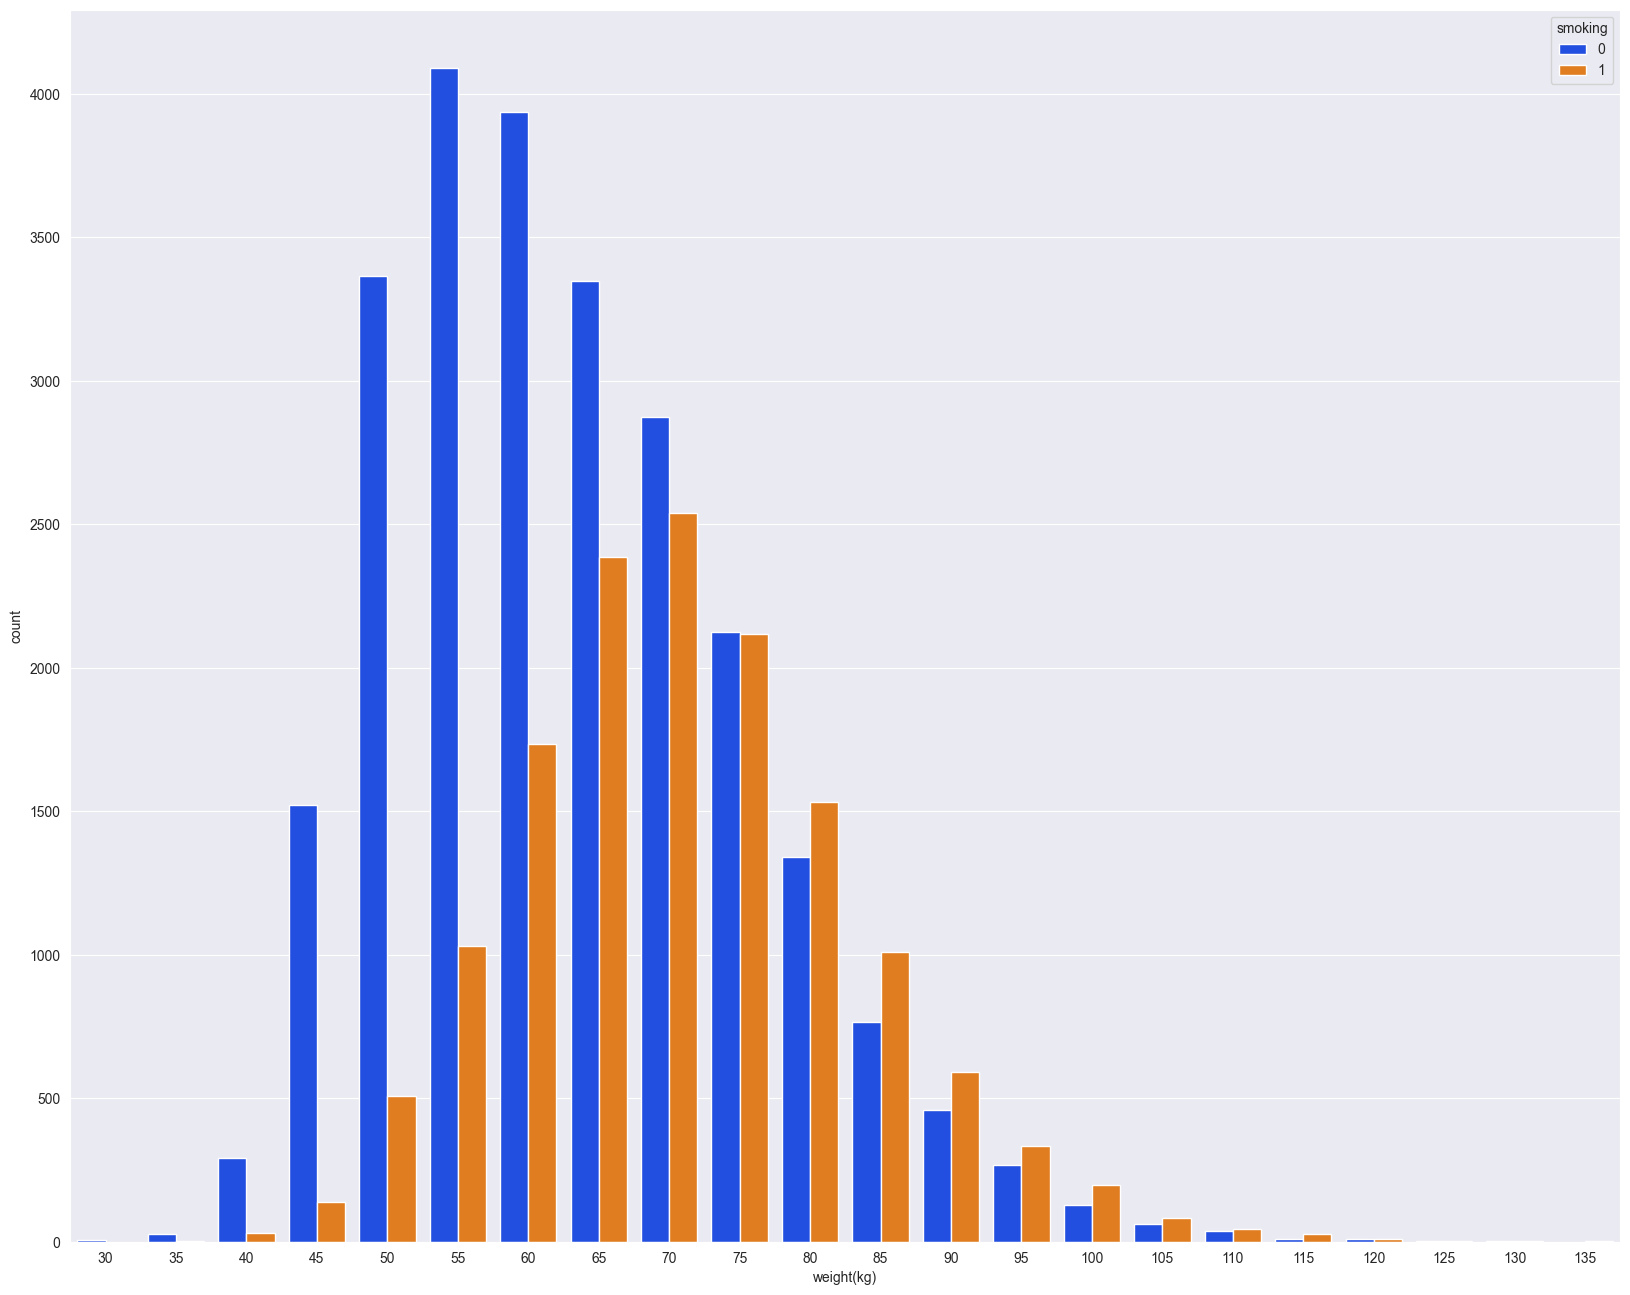

In [14]:
plt.figure(figsize = (20, 16))
sns.countplot(data = df, x = 'weight(kg)', hue = 'smoking', palette = 'bright')

>Berdasarkan diagram diatas, orang yang memiliki berat badan diatas 80 kg memiliki persentase perokok lebih besar dibandingkan yang tidak merokok.

*Perbandingan Perokok dengan Kadar Hemoglobin dalam Darah*

<Axes: xlabel='hemoglobin', ylabel='count'>

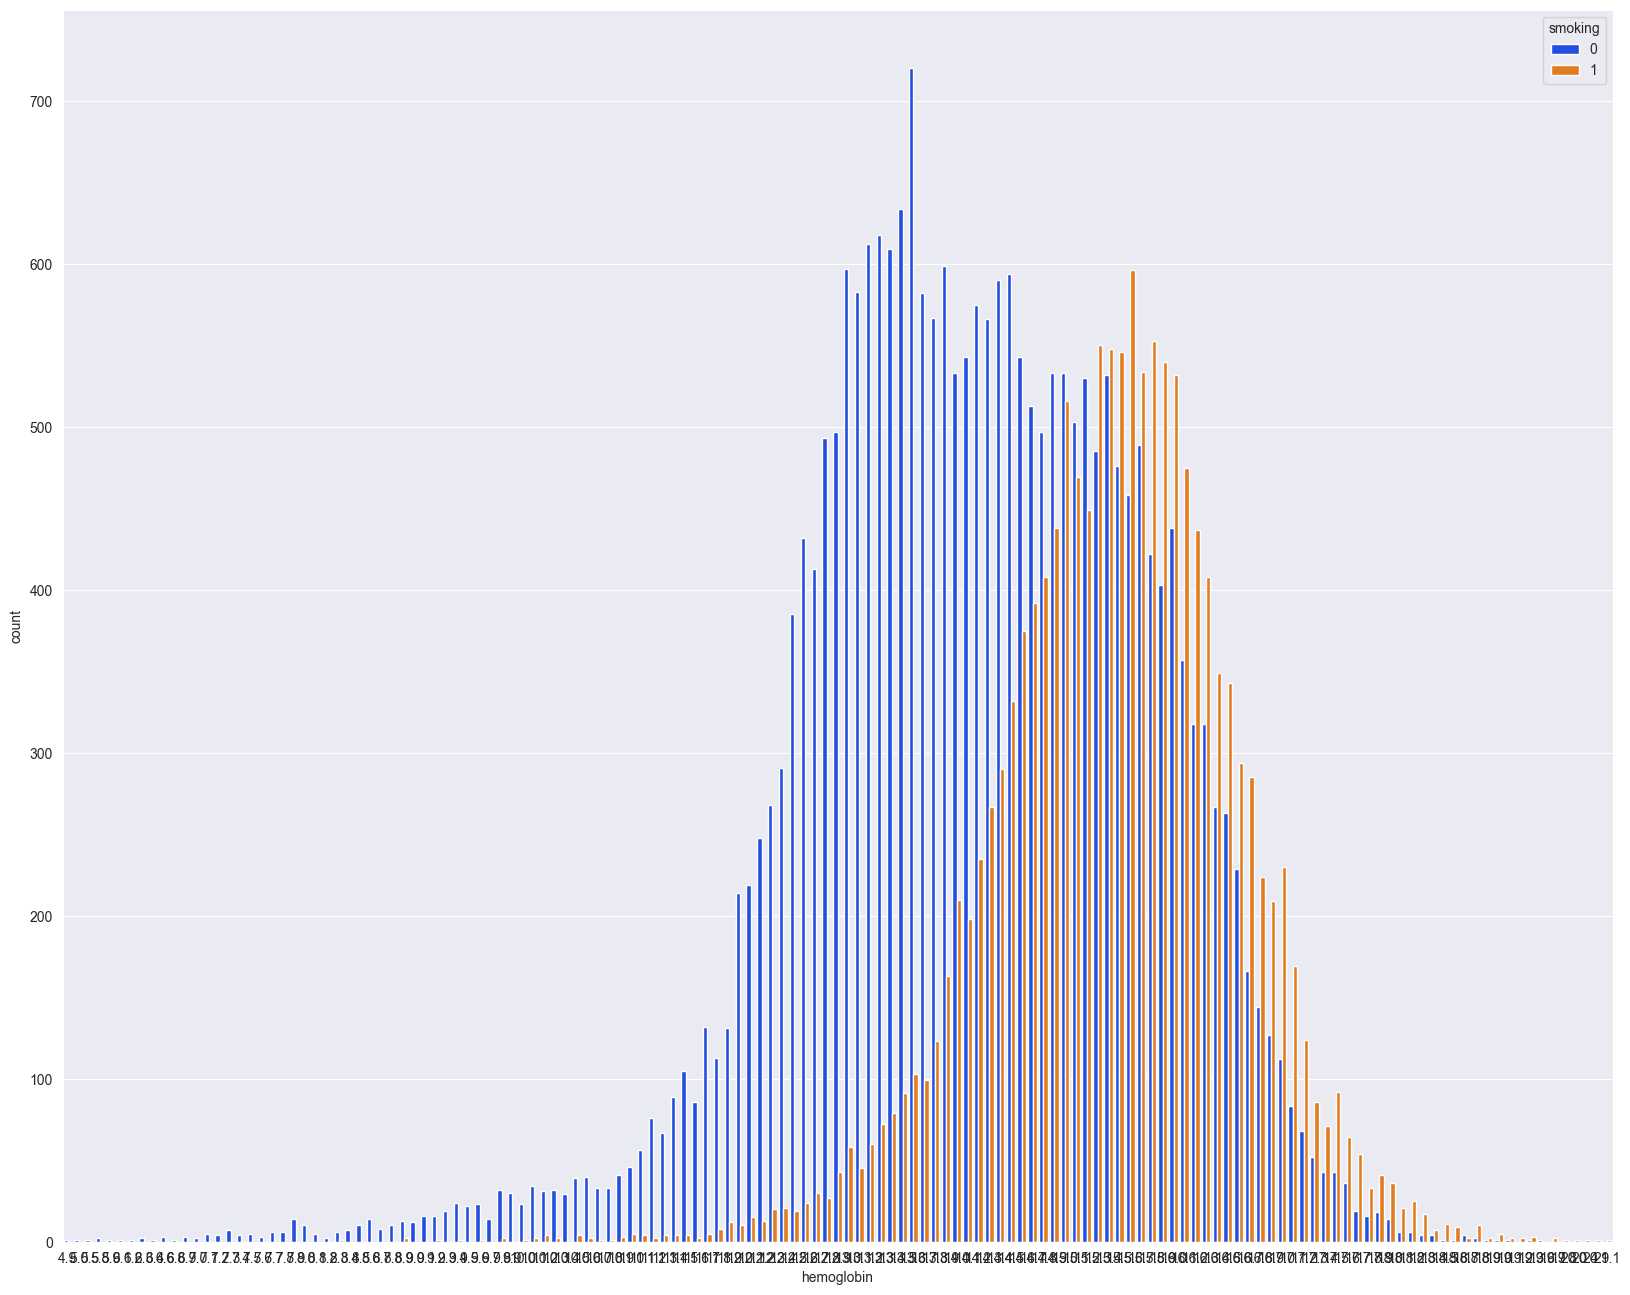

In [15]:
plt.figure(figsize = (20, 16))
sns.countplot(data = df, x = 'hemoglobin', hue = 'smoking', palette = 'bright')

>karena indicator kadar hemoglobinnya terlalu variatif, kita buat interval yang lebih mudah dipahami

In [16]:
bin_intervals = [4, 8, 12, 16, 20, 24]

<Axes: xlabel='hemoglobin_interval', ylabel='count'>

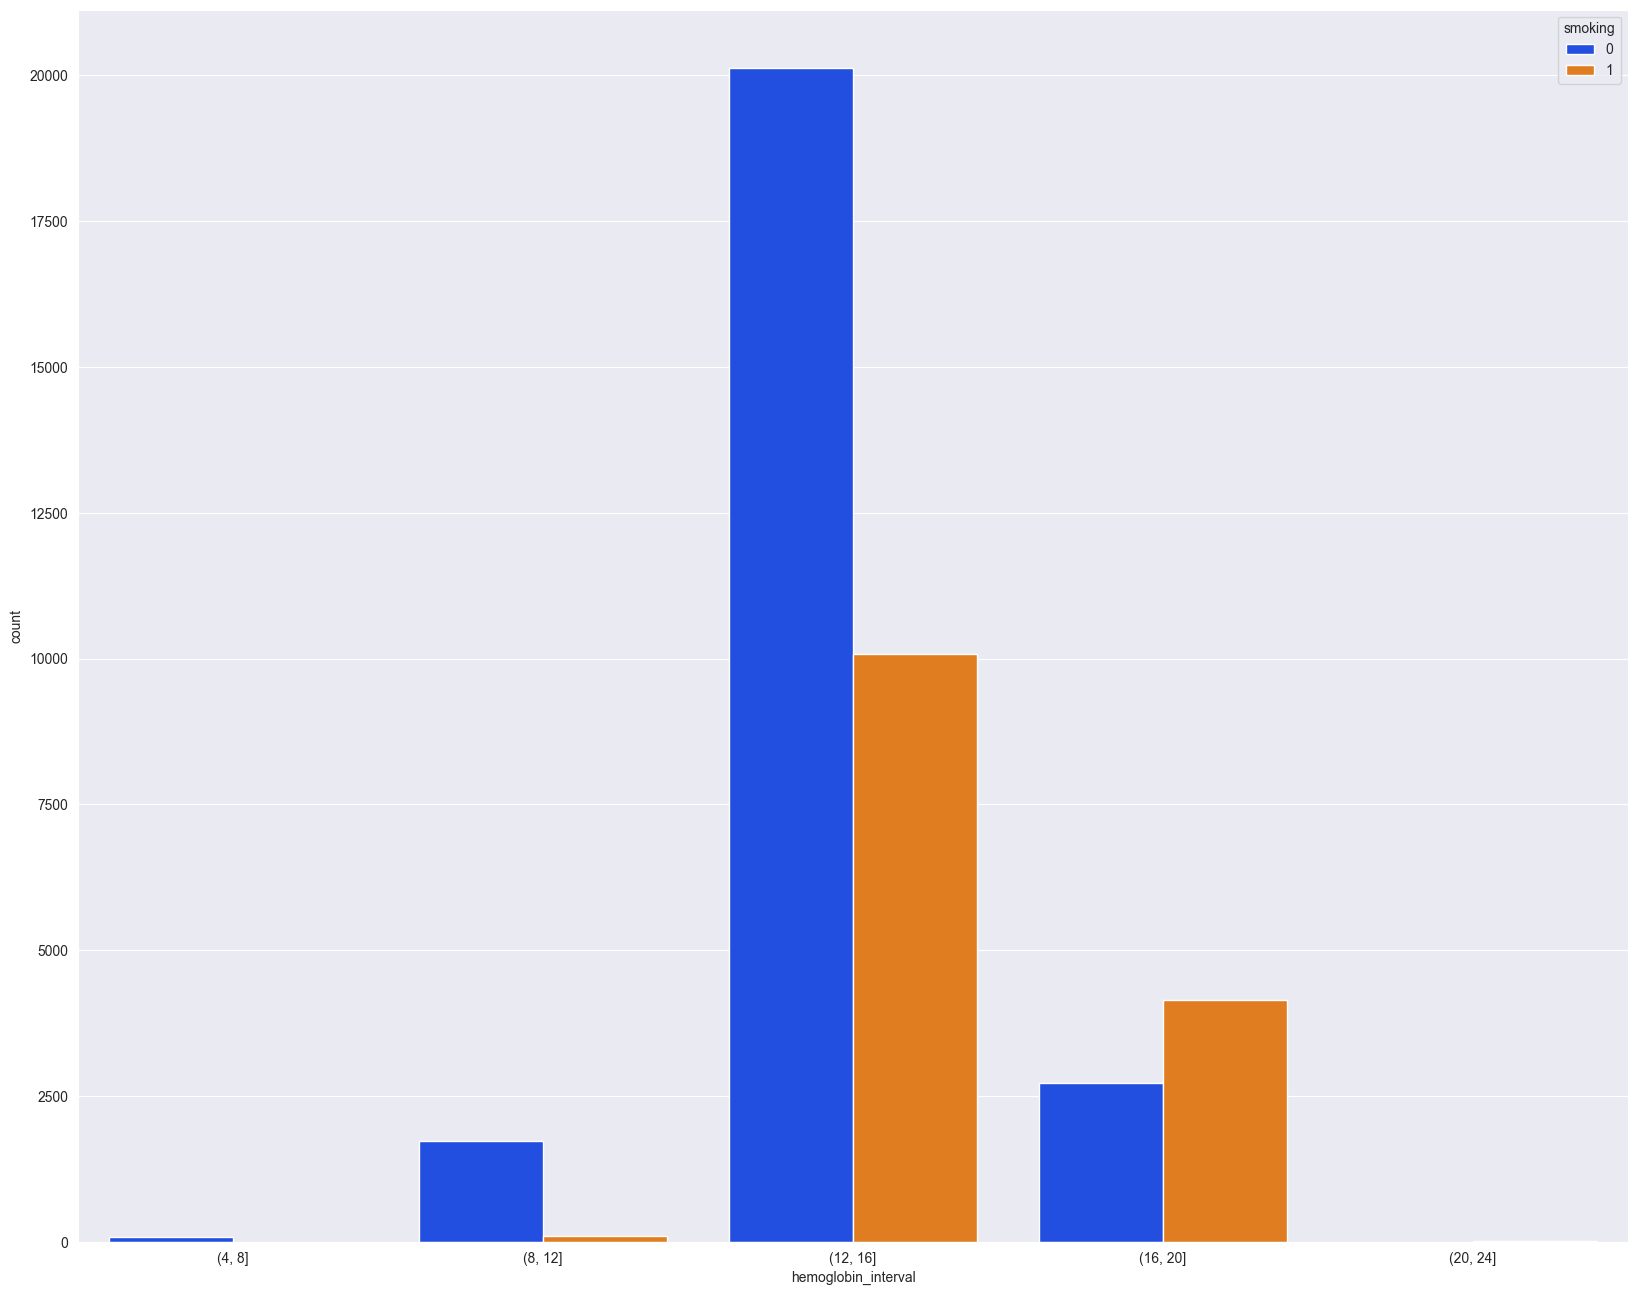

In [17]:
df['hemoglobin_interval'] = pd.cut(df['hemoglobin'], bins=bin_intervals)
plt.figure(figsize = (20, 16))
sns.countplot(data = df, x = 'hemoglobin_interval', hue = 'smoking', palette = 'bright')

>berdasarkan histogram, terlihat yang memiliki kadar hemoglobin 8-12 lebih banyak yang tidak merokok, kadar hemoglobin 12-16 lumayan banyak yang merokok tetapi jauh lebih banyak yang tidak merokok, sedangkan untuk kadar hemoglobin 16-20 terlihat lebih banyak yang merokok.

*Perbandingan Perokok dengan Penyakit Gigi*

<Axes: xlabel='dental caries', ylabel='count'>

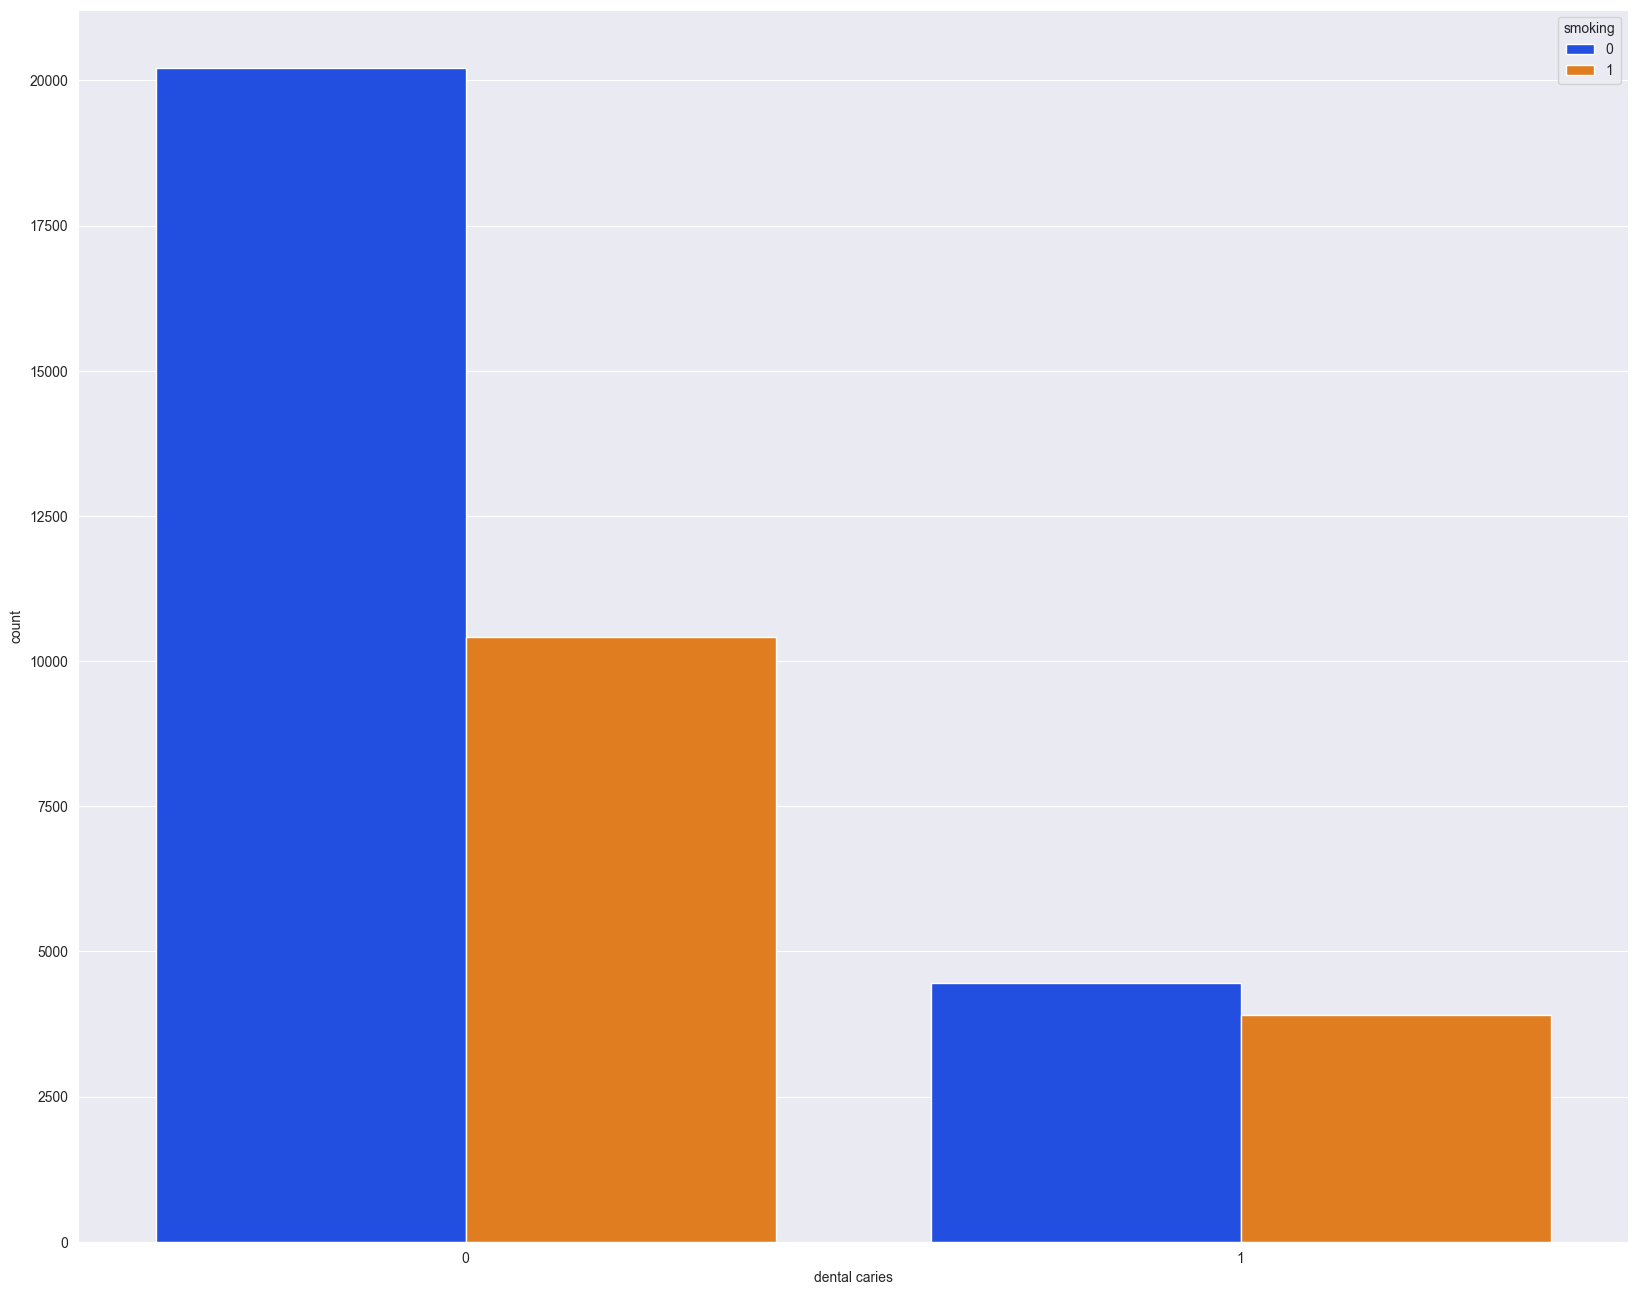

In [18]:
plt.figure(figsize = (20, 16))
sns.countplot(data = df, x = 'dental caries', hue = 'smoking', palette = 'bright')

>Menurut histogram, orang yang tidak memiliki penyakit gigi memiliki perbedaan yang signifikan antara jumlah perokok, sedangkan yang memiliki penyakit gigi tidak terlalu jauh perbedaannya antara yang perokok dan tidak merokok. Kesimpulan dari grafik tersebut adalah orang yang memiliki penyakit gigi lebih cenderung perokok.

#### Preprocessing

>tidak ada data yang kosong, maka kita bisa lanjutkan untuk cek tipe data.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  38984 non-null  int64   
 1   height(cm)           38984 non-null  int64   
 2   weight(kg)           38984 non-null  int64   
 3   waist(cm)            38984 non-null  float64 
 4   eyesight(left)       38984 non-null  float64 
 5   eyesight(right)      38984 non-null  float64 
 6   hearing(left)        38984 non-null  int64   
 7   hearing(right)       38984 non-null  int64   
 8   systolic             38984 non-null  int64   
 9   relaxation           38984 non-null  int64   
 10  fasting blood sugar  38984 non-null  int64   
 11  Cholesterol          38984 non-null  int64   
 12  triglyceride         38984 non-null  int64   
 13  HDL                  38984 non-null  int64   
 14  LDL                  38984 non-null  int64   
 15  hemoglobin         

>semua data bertipe integer dan float, tetapi ada satu yang bertipe category.

*Lakukan One Hot Encoding ke Kolom yang bertipe Category agar bisa diproses*

In [20]:
one_hot_columns = ["hemoglobin_interval"]

# Gunakan One Hot Encoding
df = pd.get_dummies(df, columns=one_hot_columns)

In [21]:
X = df.drop(columns = ['smoking', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'])
y = df['smoking']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Modelling

#### Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

In [25]:
accuracy_gnb = accuracy_score(y_test, gnb_pred)
print(f"Akurasi Naive Bayes: {accuracy_gnb}")


Akurasi Naive Bayes: 0.6877003975888162


>Kita gunakan algoritma yang lain sebagai pembanding Naive Bayes, seperti Random Forest dan KNN

#### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [28]:
accuracy_rf = accuracy_score(y_test, rf_pred)
print(f"Akurasi Random Forest: {accuracy_rf}")

Akurasi Random Forest: 0.8044119533153777


#### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [31]:
accuracy_knn = accuracy_score(y_test, knn_pred)
print(f"Akurasi KNN: {accuracy_knn}")

Akurasi KNN: 0.7041169680646402


#### Model Comparison

In [32]:
models = pd.DataFrame(
    {
        "Model": [
            "Naive Bayes",
            "Random Forest",
            "KNN",
        ],
        "Accuracy": [accuracy_gnb, accuracy_rf, accuracy_knn],
    }
)

models.sort_values(by = "Accuracy", ascending = False)

Model  Accuracy
1  Random Forest  0.804412
2            KNN  0.704117
0    Naive Bayes  0.687700

In [33]:
import plotly.express as px

models_sorted = models.sort_values(by="Accuracy", ascending=True)

fig = px.bar(
    data_frame=models_sorted,
    x = "Accuracy",
    y = "Model",
    color = "Accuracy",
    template = "plotly_white",
    title = "Komparasi Akurasi Model",
)

fig.show()

## Kesimpulan

*Dari Dataset tersebut dapat kita analisis dari berbagai macam aspek. Kami baru diajarkan tentang Teorema Bayes, oleh karena itu kita gunakan Naive Bayes, tetapi kami improvisasi dengan menggunakan algoritma pembanding seperti Random Forest dan KNN. Kami mendapatkan bahwa, Random Forest merupakan algoritma yang lebih baik untuk mendapatkan akurasi untuk menentukan perokok*